In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
import pandas as pd

data = pd.read_csv('drive/My Drive/Fraud Data Set/FraudData.csv')

In [4]:
print(data.shape)

(6362620, 11)


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [ ]:
data.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


In [ ]:
data['isFraud'].value_counts()

,count
isFraud,
0,6354407
1,8213


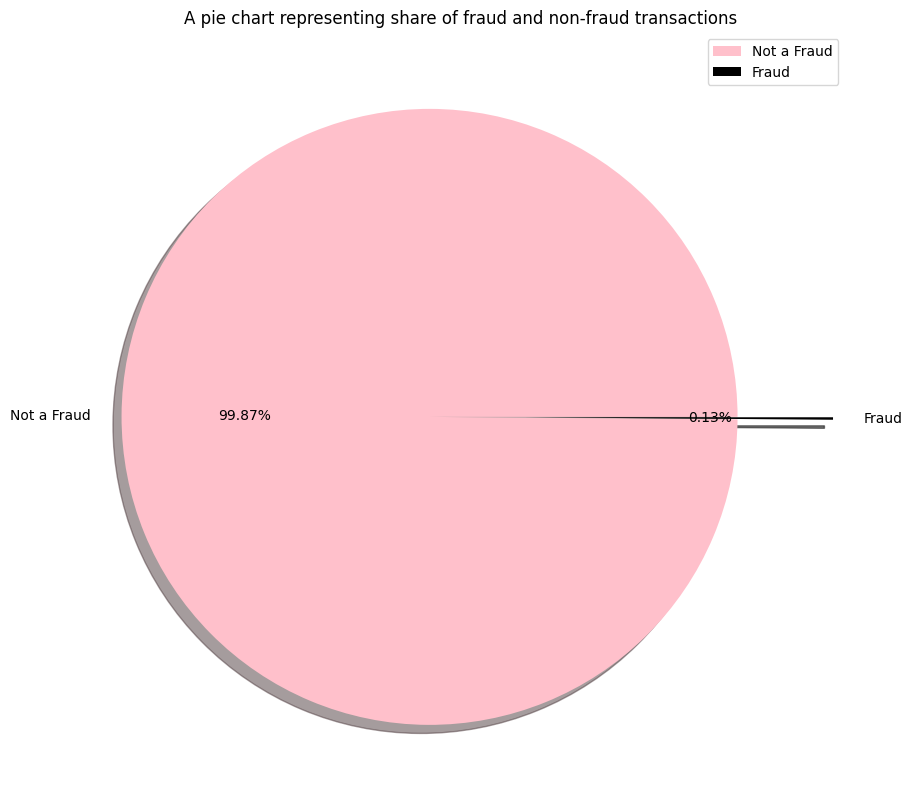

In [ ]:
labels = ['Not a Fraud', 'Fraud']
colors = ["pink", 'black']
size = ['6354407', '8213']
explode = [0.1, 0.21]
plt.rcParams['figure.figsize'] = (10,10)
plt.pie(size, colors = colors, labels = labels, explode = explode, autopct = '%.2f%%', shadow = True)
plt.title('A pie chart representing share of fraud and non-fraud transactions')
plt.legend()
plt.axis('off')
plt.show()



In [ ]:
data['isFlaggedFraud'].value_counts()


,count
isFlaggedFraud,
0,6362604
1,16


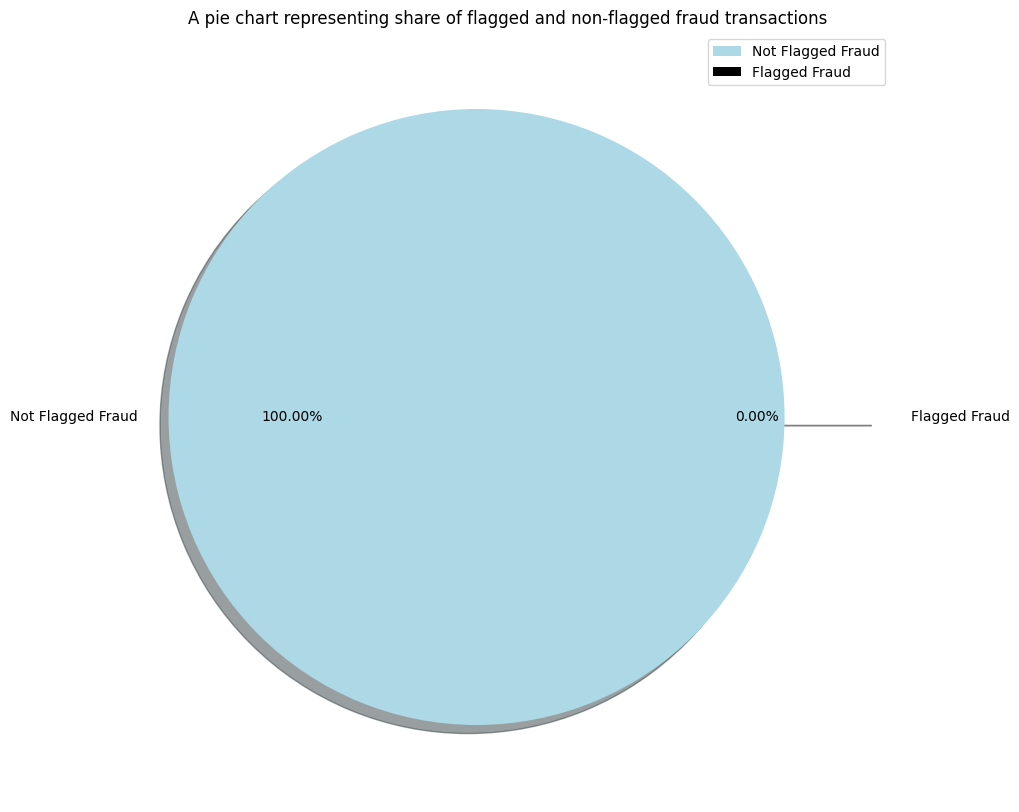

In [ ]:
import matplotlib.pyplot as plt
labels = ['Not Flagged Fraud', 'Flagged Fraud']
colors = ["lightblue", 'black']
size = [6362604, 16]
explode = [0.1, 0.21]
plt.rcParams['figure.figsize'] = (10,10)
plt.pie(size, colors = colors, labels = labels, explode = explode, autopct = '%.2f%%', shadow = True)
plt.title('A pie chart representing share of flagged and non-flagged fraud transactions')
plt.legend()
plt.axis('off')
plt.show()


In [ ]:
data['type'].value_counts()

,count
type,
CASH_OUT,2237500
PAYMENT,2151495
CASH_IN,1399284
TRANSFER,532909
DEBIT,41432


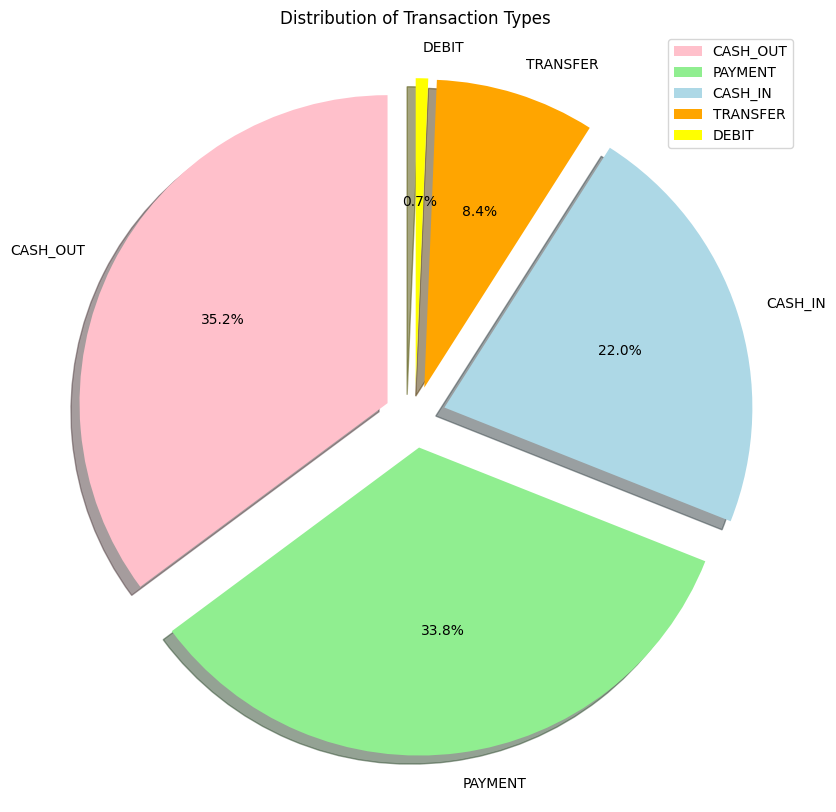

In [ ]:
labels = data['type'].value_counts().index.tolist()
sizes = data['type'].value_counts().values
colors = ['pink', 'lightgreen', 'lightblue', 'orange', 'yellow']
explode = [0.1, 0.1, 0.1, 0.1, 0.1]

plt.rcParams['figure.figsize'] = (10, 10)
plt.pie(sizes, labels=labels, colors=colors, explode=explode, autopct='%1.1f%%', shadow=True, startangle=90)
plt.title('Distribution of Transaction Types')
plt.axis('off')
plt.legend()
plt.show()


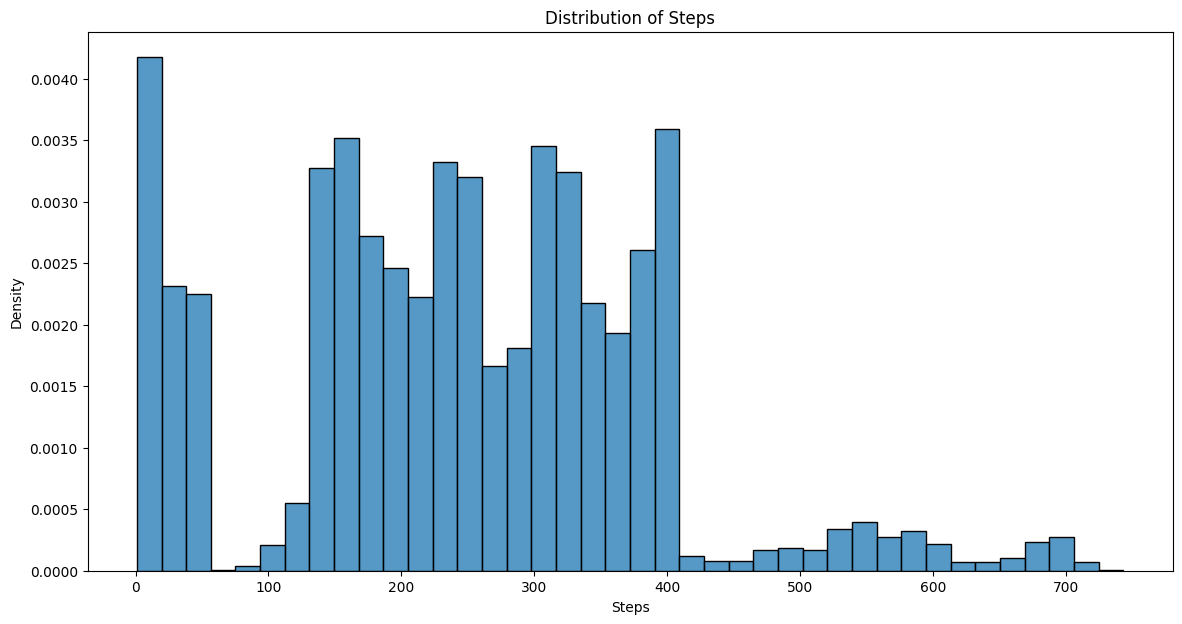

In [ ]:
plt.rcParams['figure.figsize'] = (14, 7)
sns.histplot(data.step, kde=False,bins=40, stat="density")  # kde=False to disable kernel density estimate
plt.title('Distribution of Steps')
plt.xlabel('Steps')
plt.ylabel('Density')
plt.show()

<ipython-input-14-897624b76669>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data.step, fit = norm,  kde=False)


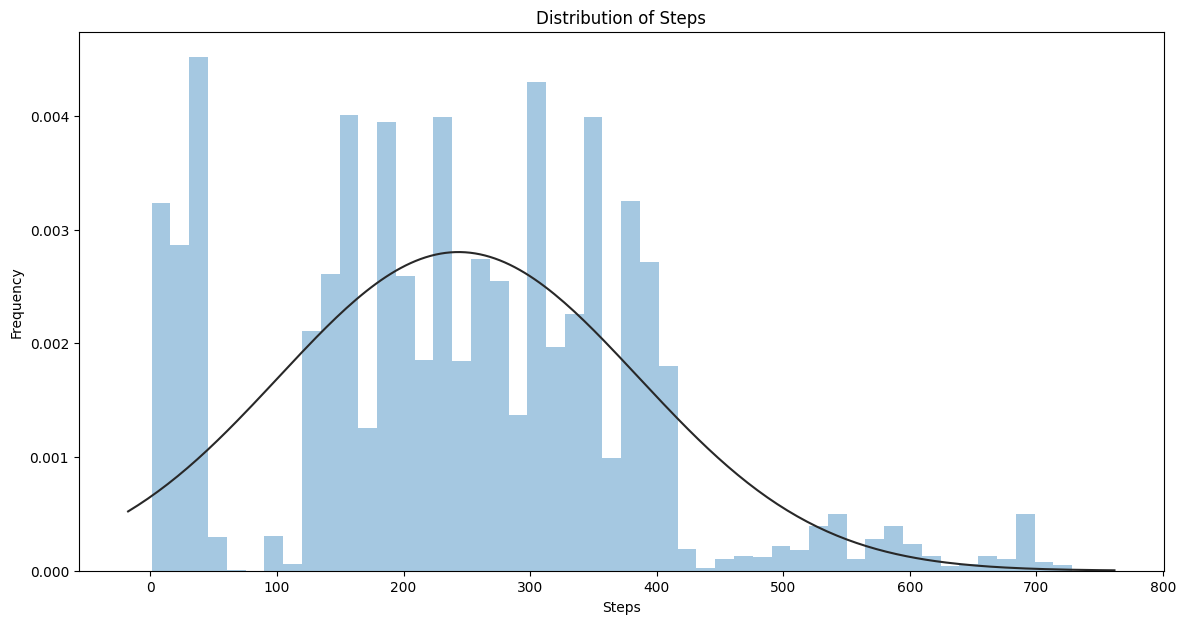

In [ ]:
plt.rcParams['figure.figsize'] = (14,7)
from scipy.stats import norm
sns.distplot(data.step, fit = norm,  kde=False)
plt.title('Distribution of Steps')
plt.xlabel('Steps')
plt.ylabel('Frequency')
plt.show()

In [ ]:
#plotting distribution of stes but with displot
# sns.displot(data.step,bins=35 ,kde=False, height=7, aspect=2)  # height and aspect control figure size
# plt.title('Distribution of Steps')
# plt.xlabel('Steps')
# plt.ylabel('Frequency')
# plt.show()

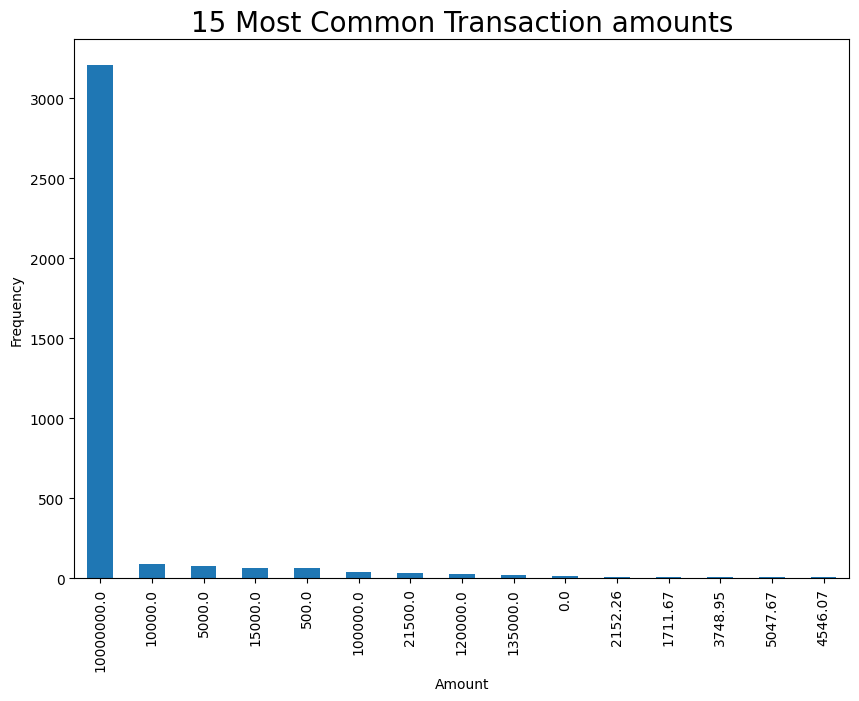

In [ ]:
plt.rcParams['figure.figsize'] = (10,7)

data['amount'].value_counts().head(15).plot.bar()
# data['amount'].value_counts().head(15).plo,t(kind = 'bar')
plt.title('15 Most Common Transaction amounts', fontsize=20)
plt.xlabel('Amount')
plt.ylabel('Frequency')
plt.show()

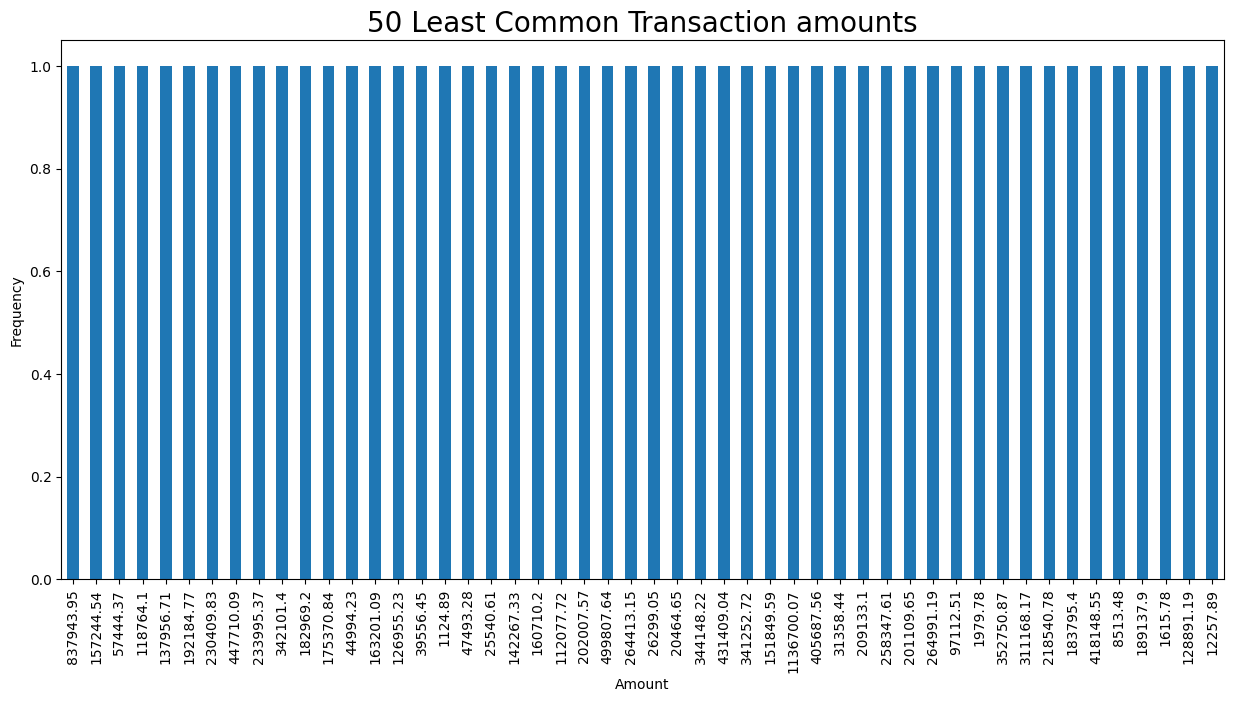

In [ ]:
plt.rcParams['figure.figsize'] = (15,7)

data['amount'].value_counts().tail(50).plot.bar()
# data['amount'].value_counts().head(15).plo,t(kind = 'bar')
plt.title('50 Least Common Transaction amounts', fontsize=20)
plt.xlabel('Amount')
plt.ylabel('Frequency')
plt.show()

<ipython-input-18-ec6ecc8aafa2>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(data.amount)


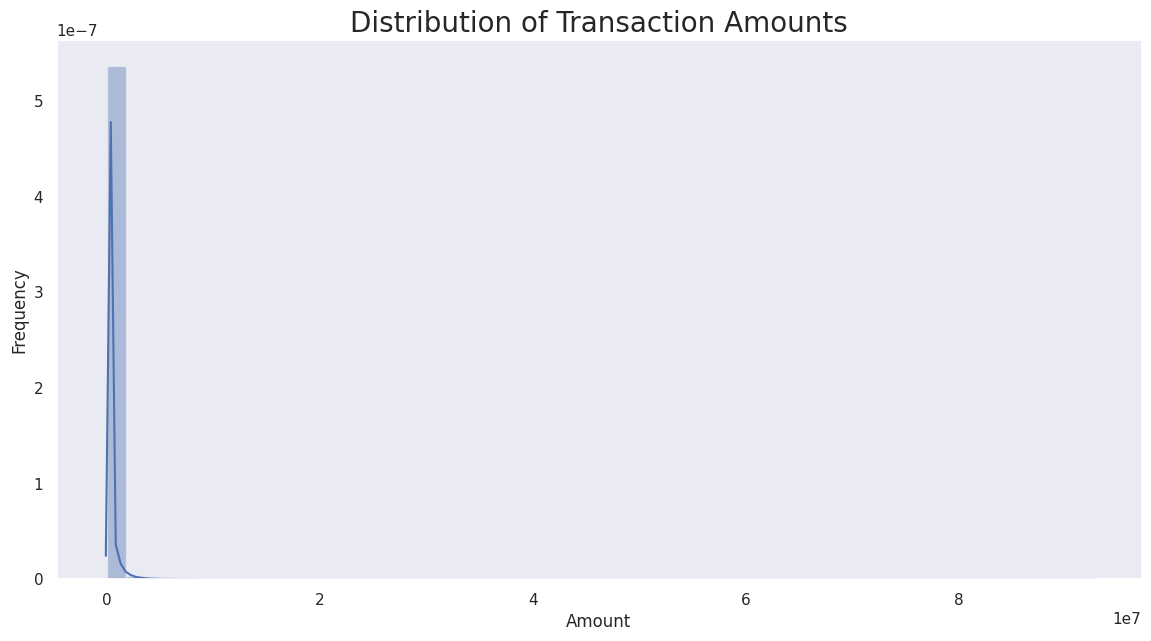

In [ ]:
plt.rcParams['figure.figsize'] = (14,7)
sns.set(style='dark', palette='deep')
ax = sns.distplot(data.amount)
ax.set_title('Distribution of Transaction Amounts', fontsize=20)
ax.set_xlabel('Amount')
ax.set_ylabel('Frequency')
plt.show()

In [ ]:
print(f"The Types of fraudulent transactions are {data[data['isFraud'] == 1]['type'].unique()}")

The Types of fraudulent transactions are ['TRANSFER' 'CASH_OUT']


In [ ]:
dfFraudTransfer = data.loc[(data.isFraud == 1) & (data.type == 'TRANSFER')]
dfFraudCashout = data.loc[(data.isFraud == 1) & (data.type == 'CASH_OUT')]

print('The amount of fraudulant TRANSFERs = {}'.format(len(dfFraudTransfer)))
print('The amount of fraudulant CASH_OUTs = {}'.format(len(dfFraudCashout)))


The amount of fraudulant TRANSFERs = 4097
The amount of fraudulant CASH_OUTs = 4116


In [ ]:
print('Transfer Transaction')
print("Minimum Transaction :", data.loc[(data.isFraud ==1) & (data.type == "TRANSFER")].amount.min())
print("Maximum Transaction :", data.loc[(data.isFraud ==1) & (data.type == "TRANSFER")].amount.max())

print('CashOut Transaction')
print("Minimum Transaction :", data.loc[(data.isFraud ==1) & (data.type == "CASH_OUT")].amount.min())
print("Maximum Transaction :", data.loc[(data.isFraud ==1) & (data.type == "CASH_OUT")].amount.max())


Transfer Transaction
Minimum Transaction : 63.8
Maximum Transaction : 10000000.0
CashOut Transaction
Minimum Transaction : 0.0
Maximum Transaction : 10000000.0


In [ ]:
print("The Type of transactions where IsFlaggedFraud is set:", data.loc[data.isFlaggedFraud == 1].type.unique())

The Type of transactions where IsFlaggedFraud is set: ['TRANSFER']


In [ ]:
print('The no. of transactions where IsFlaggedFraud is set:', len(data.loc[data.isFlaggedFraud == 1]))
print("The max amount of transaction where IsFlaggedFraud is set:", data.loc[data.isFlaggedFraud==1].amount.max())
print("The min amount of transaction where IsFlaggedFraud is set:", data.loc[data.isFlaggedFraud==1].amount.min())

The no. of transactions where IsFlaggedFraud is set: 16
The max amount of transaction where IsFlaggedFraud is set: 10000000.0
The min amount of transaction where IsFlaggedFraud is set: 353874.22


In [ ]:
x = data.loc[(data.isFlaggedFraud == 1) & (data.oldbalanceDest == 0) & (data.newbalanceDest == 0)]
print("Figuring out the no. of transactions where old balance dest. and new balance dest. are both 0:", len(x))


Figuring out the no. of transactions where old balance dest. and new balance dest. are both 0: 16


In [ ]:
dataTransfer = data.loc[data.type == 'TRANSFER']
dataTransfer = pd.DataFrame(dataTransfer)

dataTransfer.loc[(dataTransfer.isFlaggedFraud == 1) & (dataTransfer.oldbalanceOrg == dataTransfer.newbalanceOrig)].sort_values(by = 'oldbalanceOrg').head(10)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
6205439,586,TRANSFER,353874.22,C1684585475,353874.22,353874.22,C1770418982,0.0,0.0,1,1
3760288,279,TRANSFER,536624.41,C1035541766,536624.41,536624.41,C1100697970,0.0,0.0,1,1
3247297,250,TRANSFER,1343002.08,C1100582606,1343002.08,1343002.08,C1147517658,0.0,0.0,1,1
6266413,617,TRANSFER,2542664.27,C786455622,2542664.27,2542664.27,C661958277,0.0,0.0,1,1
6351225,702,TRANSFER,3171085.59,C1892216157,3171085.59,3171085.59,C1308068787,0.0,0.0,1,1
6296014,671,TRANSFER,3441041.46,C917414431,3441041.46,3441041.46,C1082139865,0.0,0.0,1,1
6168499,554,TRANSFER,3576297.10,C193696150,3576297.10,3576297.10,C484597480,0.0,0.0,1,1
5563713,387,TRANSFER,4892193.09,C908544136,4892193.09,4892193.09,C891140444,0.0,0.0,1,1
2736446,212,TRANSFER,4953893.08,C728984460,4953893.08,4953893.08,C639921569,0.0,0.0,1,1
6362584,741,TRANSFER,5674547.89,C992223106,5674547.89,5674547.89,C1366804249,0.0,0.0,1,1


In [ ]:
dataTransfer.loc[(dataTransfer.isFlaggedFraud == 1) & (dataTransfer.oldbalanceOrg == dataTransfer.newbalanceOrig)].sort_values(by = 'oldbalanceOrg').tail(10)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
6168499,554,TRANSFER,3576297.10,C193696150,3576297.10,3576297.10,C484597480,0.0,0.0,1,1
5563713,387,TRANSFER,4892193.09,C908544136,4892193.09,4892193.09,C891140444,0.0,0.0,1,1
2736446,212,TRANSFER,4953893.08,C728984460,4953893.08,4953893.08,C639921569,0.0,0.0,1,1
6362584,741,TRANSFER,5674547.89,C992223106,5674547.89,5674547.89,C1366804249,0.0,0.0,1,1
6281482,646,TRANSFER,10000000.00,C19004745,10399045.08,10399045.08,C1806199534,0.0,0.0,1,1
6281484,646,TRANSFER,399045.08,C724693370,10399045.08,10399045.08,C1909486199,0.0,0.0,1,1
6362460,730,TRANSFER,10000000.00,C2140038573,17316255.05,17316255.05,C1395467927,0.0,0.0,1,1
6362462,730,TRANSFER,7316255.05,C1869569059,17316255.05,17316255.05,C1861208726,0.0,0.0,1,1
5996407,425,TRANSFER,10000000.00,C689608084,19585040.37,19585040.37,C1392803603,0.0,0.0,1,1
5996409,425,TRANSFER,9585040.37,C452586515,19585040.37,19585040.37,C1109166882,0.0,0.0,1,1


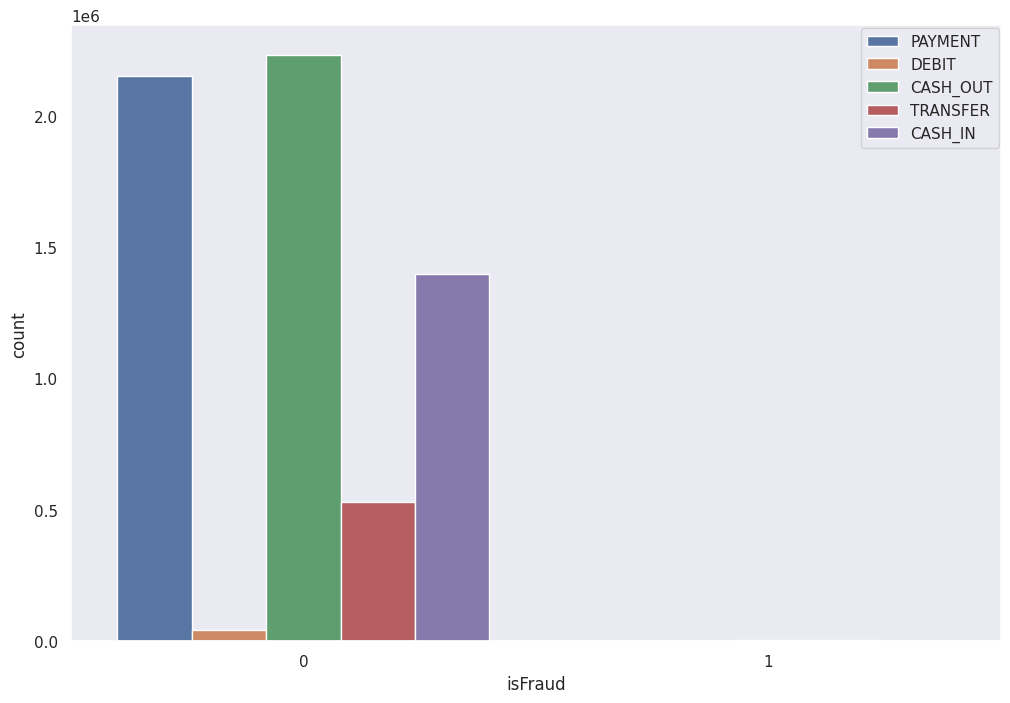

In [ ]:
plt.figure(figsize=(12, 8))
sns.countplot(x='isFraud', data = data, hue='type')
plt.legend(loc=[0.85,0.8])

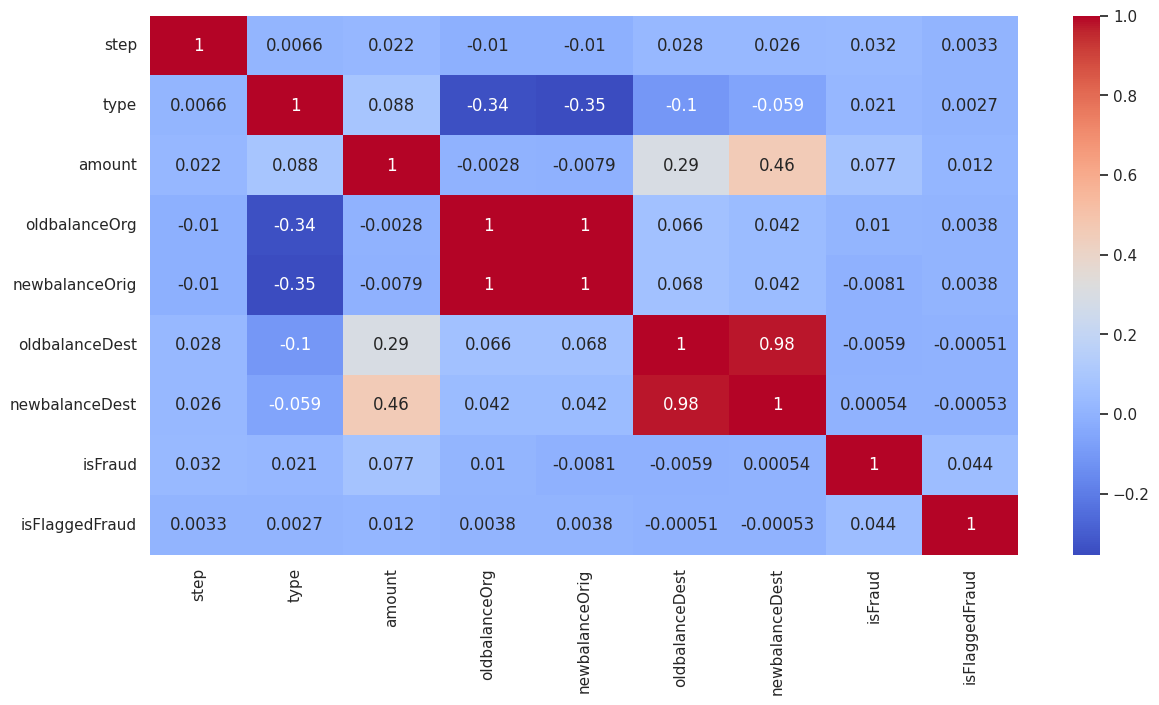

In [ ]:
df = pd.DataFrame(data)

dmap = {'PAYMENT':1, 'TRANSFER':2, 'CASH_OUT':3, 'DEBIT':4, 'CASH_IN':5}
df['type'] = df['type'].astype('category').cat.codes
df = df.drop(['nameOrig', 'nameDest'], axis=1)
corr = df.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()

In [ ]:
import gc
del df
gc.collect()

16986



**As we have seen only transaction type "TRANSFER" and "CASH_OUT" has fraudulent transactions. So we can filter and only those transactions and proceed with preprocessing.**

In [4]:
# making dependent and independent sets
X = data.loc[(data.type == 'TRANSFER' )|( data.type == 'CASH_OUT')]
X.shape

(2770409, 11)

In [ ]:
X

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
2,1,TRANSFER,181.00,C1305486145,181.00,0.0,C553264065,0.00,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.0,C38997010,21182.00,0.00,1,0
15,1,CASH_OUT,229133.94,C905080434,15325.00,0.0,C476402209,5083.00,51513.44,0,0
19,1,TRANSFER,215310.30,C1670993182,705.00,0.0,C1100439041,22425.00,0.00,0,0
24,1,TRANSFER,311685.89,C1984094095,10835.00,0.0,C932583850,6267.00,2719172.89,0,0
...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.0,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.0,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.0,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.0,C2080388513,0.00,0.00,1,0


In [5]:
X['errorBalanceOrig'] = X.newbalanceOrig + X.amount - X.oldbalanceOrg
X['errorBalanceDest'] = X.oldbalanceDest + X.amount - X.newbalanceDest


<ipython-input-5-d11107bf600f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['errorBalanceOrig'] = X.newbalanceOrig + X.amount - X.oldbalanceOrg
<ipython-input-5-d11107bf600f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['errorBalanceDest'] = X.oldbalanceDest + X.amount - X.newbalanceDest


As 'oldbalaceDest' and 'newbalaceDest' have high correlatin and at the same newbalaceDest has very less correlation with class label, so we can drop this.Similarly we can also drop 'newbalanceOrig'

In [6]:
X = X.drop(['newbalanceDest', 'newbalanceOrig'], axis=1)

In [ ]:
X

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,isFraud,isFlaggedFraud,errorBalanceOrig,errorBalanceDest
2,1,TRANSFER,181.00,C1305486145,181.00,0.0,C553264065,0.00,1,0,0.00,1.810000e+02
3,1,CASH_OUT,181.00,C840083671,181.00,0.0,C38997010,21182.00,1,0,0.00,2.136300e+04
15,1,CASH_OUT,229133.94,C905080434,15325.00,0.0,C476402209,5083.00,0,0,213808.94,1.827035e+05
19,1,TRANSFER,215310.30,C1670993182,705.00,0.0,C1100439041,22425.00,0,0,214605.30,2.377353e+05
24,1,TRANSFER,311685.89,C1984094095,10835.00,0.0,C932583850,6267.00,0,0,300850.89,-2.401220e+06
...,...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.0,C776919290,0.00,1,0,0.00,0.000000e+00
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.0,C1881841831,0.00,1,0,0.00,6.311409e+06
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.0,C1365125890,68488.84,1,0,0.00,1.000000e-02
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.0,C2080388513,0.00,1,0,0.00,8.500025e+05


In [7]:
X = X.drop(['nameOrig', 'nameDest'], axis=1)


In [8]:
X['type'].replace({'TRANSFER': 0, 'CASH_OUT': 1}, inplace=True)
X

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,isFraud,isFlaggedFraud,errorBalanceOrig,errorBalanceDest
2,1,0,181.00,181.00,0.0,0.00,1,0,0.00,1.810000e+02
3,1,1,181.00,181.00,0.0,21182.00,1,0,0.00,2.136300e+04
15,1,1,229133.94,15325.00,0.0,5083.00,0,0,213808.94,1.827035e+05
19,1,0,215310.30,705.00,0.0,22425.00,0,0,214605.30,2.377353e+05
24,1,0,311685.89,10835.00,0.0,6267.00,0,0,300850.89,-2.401220e+06
...,...,...,...,...,...,...,...,...,...,...
6362615,743,1,339682.13,339682.13,0.0,0.00,1,0,0.00,0.000000e+00
6362616,743,0,6311409.28,6311409.28,0.0,0.00,1,0,0.00,6.311409e+06
6362617,743,1,6311409.28,6311409.28,0.0,68488.84,1,0,0.00,1.000000e-02
6362618,743,0,850002.52,850002.52,0.0,0.00,1,0,0.00,8.500025e+05


In [9]:
X.isnull().any().any()

False

<ipython-input-10-fd1e8437d1cb>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X['errorBalanceOrig'], color='red')
<ipython-input-10-fd1e8437d1cb>:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X['errorBalanceDest'], color='red')


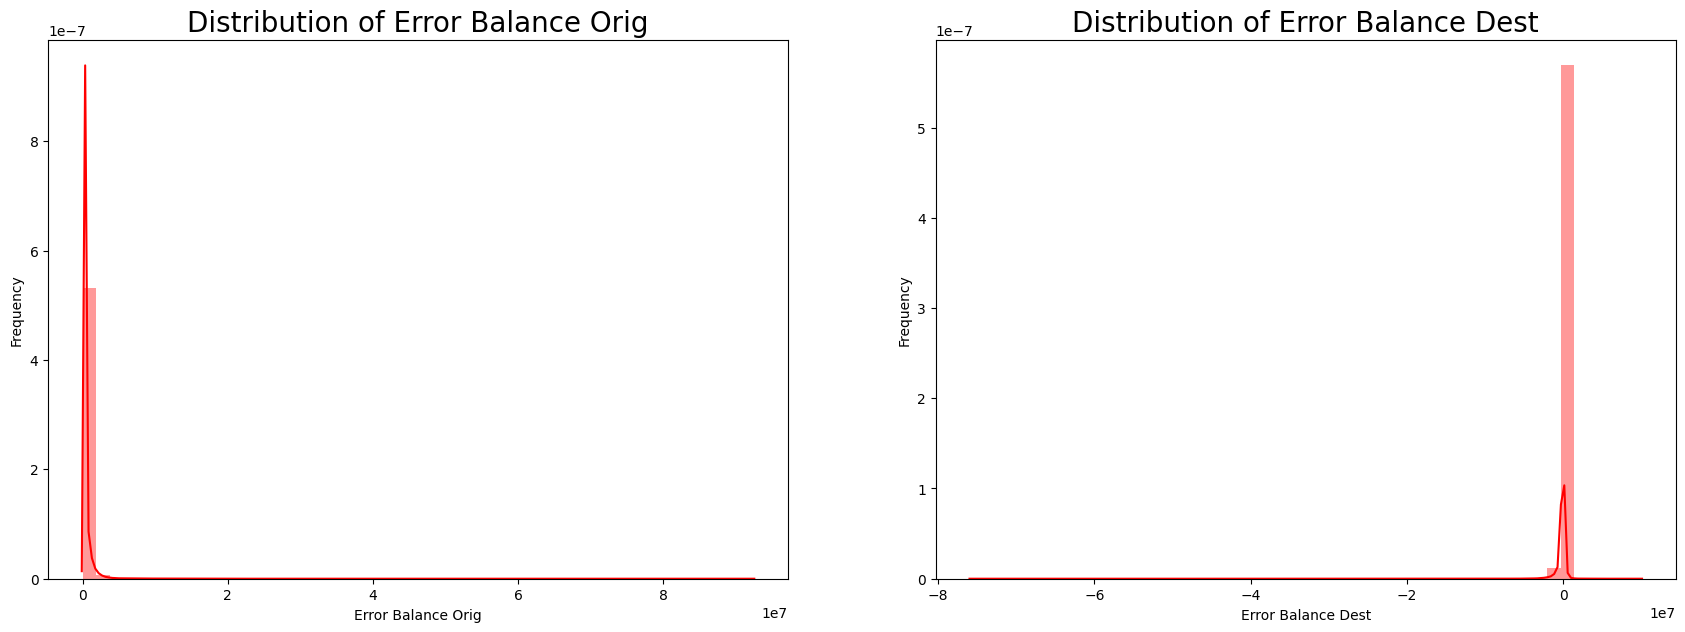

In [10]:
plt.rcParams['figure.figsize'] = (21,7)
plt.subplot(121)
sns.distplot(X['errorBalanceOrig'], color='red')
plt.title('Distribution of Error Balance Orig', fontsize=20)
plt.xlabel('Error Balance Orig')
plt.ylabel('Frequency')

plt.subplot(122)
sns.distplot(X['errorBalanceDest'], color='red')
plt.title('Distribution of Error Balance Dest', fontsize=20)
plt.xlabel('Error Balance Dest')
plt.ylabel('Frequency')
plt.show()

In [ ]:
X['isFraud'].value_counts()

,count
isFraud,
0,2762196
1,8213


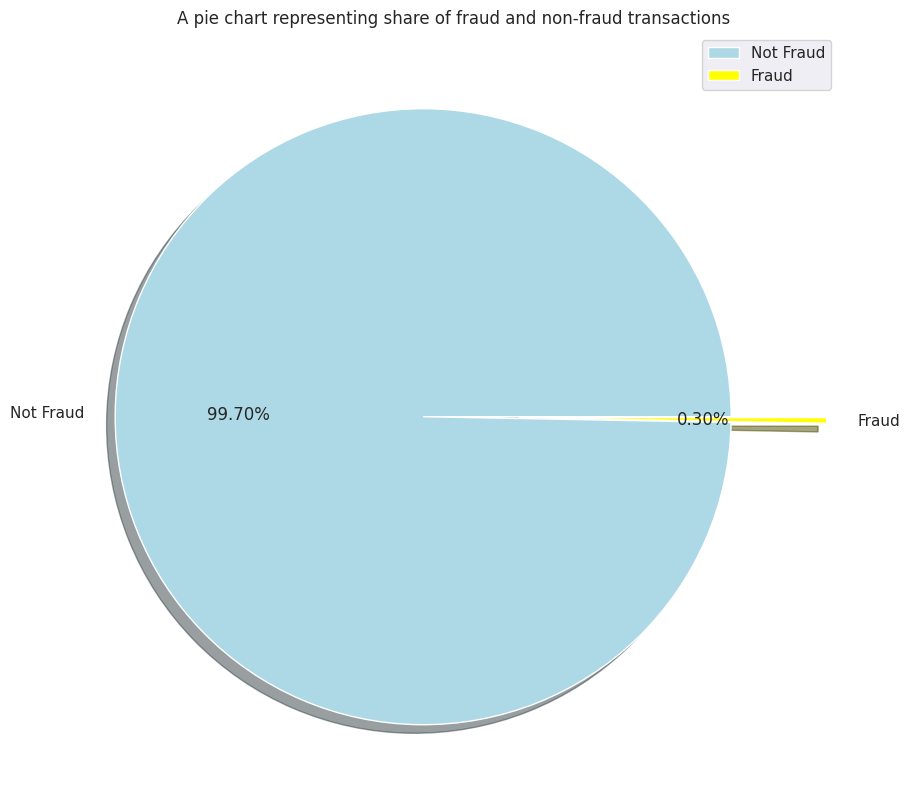

In [ ]:
size = X['isFraud'].value_counts().values
labels = ['Not Fraud', 'Fraud']
colors = ['lightblue', 'yellow']
explode = [0.1, 0.21]
plt.rcParams['figure.figsize'] = (10,10)
plt.pie(size, colors = colors, labels = labels, explode = explode, autopct = '%.2f%%', shadow = True)
plt.title('A pie chart representing share of fraud and non-fraud transactions')
plt.legend()
plt.axis('off')
plt.show()

In [11]:
Y = X['isFraud']
X = X.drop(['isFraud'], axis=1)
print(X.shape)
print(Y.shape)

(2770409, 9)
(2770409,)


In [ ]:
X

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,isFlaggedFraud,errorBalanceOrig,errorBalanceDest
2,1,0,181.00,181.00,0.0,0.00,0,0.00,1.810000e+02
3,1,1,181.00,181.00,0.0,21182.00,0,0.00,2.136300e+04
15,1,1,229133.94,15325.00,0.0,5083.00,0,213808.94,1.827035e+05
19,1,0,215310.30,705.00,0.0,22425.00,0,214605.30,2.377353e+05
24,1,0,311685.89,10835.00,0.0,6267.00,0,300850.89,-2.401220e+06
...,...,...,...,...,...,...,...,...,...
6362615,743,1,339682.13,339682.13,0.0,0.00,0,0.00,0.000000e+00
6362616,743,0,6311409.28,6311409.28,0.0,0.00,0,0.00,6.311409e+06
6362617,743,1,6311409.28,6311409.28,0.0,68488.84,0,0.00,1.000000e-02
6362618,743,0,850002.52,850002.52,0.0,0.00,0,0.00,8.500025e+05


In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(2216327, 9)
(2216327,)
(554082, 9)
(554082,)


In [ ]:

print(Y_train.value_counts())


isFraud
0    2209760
1       6567
Name: count, dtype: int64




We use SMOTE to to oversmaple minority class.

In [13]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=42)
X_train, Y_train = sm.fit_resample(X_train, Y_train)
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(4419520, 9)
(4419520,)
(554082, 9)
(554082,)


In [ ]:
#applying StandardScaler, model don't perform well
# from sklearn.preprocessing import StandardScaler
# sc = StandardScaler()
# X_train = sc.fit_transform(X_train)
# X_test = sc.transform(X_test)

We use *XGBClassifier* with default parameters.

In [14]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, f1_score
model = XGBClassifier()
model.fit(X_train, Y_train)
y_pred = model.predict(X_test)


In [15]:
from sklearn.metrics import f1_score
print('accuracy')
print(accuracy_score(Y_test, y_pred))
print('f1 score')
print(f1_score(Y_test, y_pred))
print("Confusion matrix")
print(confusion_matrix(Y_test, y_pred))
print('Classification report')
print(classification_report(Y_test, y_pred))

accuracy
0.9994332968766356
f1 score
0.9123883928571428
Confusion matrix
[[552133    303]
 [    11   1635]]
Classification report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    552436
           1       0.84      0.99      0.91      1646

    accuracy                           1.00    554082
   macro avg       0.92      1.00      0.96    554082
weighted avg       1.00      1.00      1.00    554082



The combination of a high accuracy and a strong F1 score indicates that your model is performing very well overall. The high accuracy shows the model's general effectiveness, while the F1 score confirms that it handles both precision and recall reasonably well.


Now we can try LogisticRegression.

In [ ]:
# prompt: import logistic regression and use it to build model

from sklearn.linear_model import LogisticRegression

# Create a Logistic Regression model
model_lr = LogisticRegression()

# Fit the model to the training data
model_lr.fit(X_train, Y_train)

# Make predictions on the test data
y_pred_lr = model_lr.predict(X_test)



In [ ]:
print('Evaluation of Logistic Regression Model')
print('------------------------------------')
print('f1 score')
print(f1_score(Y_test, y_pred_lr))
print('Accuracy:',accuracy_score(Y_test, y_pred_lr))
print('Confusion Matrix\n',confusion_matrix(Y_test, y_pred_lr))
print('Classification Report\n',classification_report(Y_test, y_pred_lr))
print('------------------------------------')


Evaluation of Logistic Regression Model
------------------------------------
f1 score
0.04911428219953254
Accuracy: 0.8883955804375525
Confusion Matrix
 [[490647  61789]
 [    49   1597]]
Classification Report
               precision    recall  f1-score   support

           0       1.00      0.89      0.94    552436
           1       0.03      0.97      0.05      1646

    accuracy                           0.89    554082
   macro avg       0.51      0.93      0.49    554082
weighted avg       1.00      0.89      0.94    554082

------------------------------------


We can see logistic regression performs poverly. Although we have 88% accuracy but we have very low precision for minority class.

In [ ]:
X_train.shape

(4419520, 9)

Now we try Random Froset with 50 estimators.

In [ ]:
from sklearn.ensemble import RandomForestClassifier
model_rf = RandomForestClassifier(n_estimators=50,random_state=42)
model_rf.fit(X_train, Y_train)
y_pred_rf = model_rf.predict(X_test)

In [ ]:
print('Evaluation of Random Forest Model')
print('------------------------------------')
print('f1 score')
print(f1_score(Y_test, y_pred_rf))
print('Accuracy:',accuracy_score(Y_test, y_pred_rf))
print('Confusion Matrix\n',confusion_matrix(Y_test, y_pred_rf))
print('Classification Report\n',classification_report(Y_test, y_pred_rf))
print('------------------------------------')


Evaluation of Random Forest Model
------------------------------------
f1 score
0.9852542882937105
Accuracy: 0.9999115654361629
Confusion Matrix
 [[552396     40]
 [     9   1637]]
Classification Report
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    552436
           1       0.98      0.99      0.99      1646

    accuracy                           1.00    554082
   macro avg       0.99      1.00      0.99    554082
weighted avg       1.00      1.00      1.00    554082

------------------------------------


Above provided results are good as we have accuracy and f1-score. Before we sampled only transaction of type 'TRANSFER' and 'CASH_OUT'. Now we train model on all type of transactions and see if there is any affect on model's performance.

In [6]:
df = pd.DataFrame(data)
df.head(5)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [7]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, f1_score
dmap = {'PAYMENT':1, 'TRANSFER':2, 'CASH_OUT':3, 'DEBIT':4, 'CASH_IN':5}
df = df.drop(['nameOrig', 'nameDest'], axis=1)
df['type'] = df['type'].map(dmap)
Y_full = df['isFraud']
df = df.drop(['isFraud'], axis=1)

df['errorBalanceOrig'] = df.newbalanceOrig + df.amount - df.oldbalanceOrg
df['errorBalanceDest'] = df.oldbalanceDest + df.amount - df.newbalanceDest

df = df.drop(['newbalanceDest'], axis=1)
X_train, X_test, Y_train, Y_test = train_test_split(df, Y_full, test_size=0.2, random_state=42)
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(5090096, 9)
(5090096,)
(1272524, 9)
(1272524,)


In [8]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=42)
X_train, Y_train = sm.fit_resample(X_train, Y_train)
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(10167006, 9)
(10167006,)
(1272524, 9)
(1272524,)


In [ ]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, f1_score
model = XGBClassifier()
model.fit(X_train, Y_train)
y_pred = model.predict(X_test)

In [ ]:
from sklearn.metrics import f1_score
print('accuracy')
print(accuracy_score(Y_test, y_pred))
print('f1 score')
print(f1_score(Y_test, y_pred))
print("Confusion matrix")
print(confusion_matrix(Y_test, y_pred))
print('Classification report')
print(classification_report(Y_test, y_pred))

accuracy
0.9996180818593599
f1 score
0.8692142088266952
Confusion matrix
[[1270423     481]
 [      5    1615]]
Classification report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1270904
           1       0.77      1.00      0.87      1620

    accuracy                           1.00   1272524
   macro avg       0.89      1.00      0.93   1272524
weighted avg       1.00      1.00      1.00   1272524



In [ ]:
from sklearn.linear_model import LogisticRegression

# Create a Logistic Regression model
model_lr = LogisticRegression()

# Fit the model to the training data
model_lr.fit(X_train, Y_train)

# Make predictions on the test data
y_pred_lr = model_lr.predict(X_test)

In [ ]:
print('Evaluation of Logistic Regression Model')
print('------------------------------------')
print('f1 score')
print(f1_score(Y_test, y_pred_lr))
print('Accuracy:',accuracy_score(Y_test, y_pred_lr))
print('Confusion Matrix\n',confusion_matrix(Y_test, y_pred_lr))
print('Classification Report\n',classification_report(Y_test, y_pred_lr))
print('------------------------------------')


Evaluation of Logistic Regression Model
------------------------------------
f1 score
0.026829062947267984
Accuracy: 0.9182483002285222
Confusion Matrix
 [[1167059  103845]
 [    186    1434]]
Classification Report
               precision    recall  f1-score   support

           0       1.00      0.92      0.96   1270904
           1       0.01      0.89      0.03      1620

    accuracy                           0.92   1272524
   macro avg       0.51      0.90      0.49   1272524
weighted avg       1.00      0.92      0.96   1272524

------------------------------------


In [9]:
from sklearn.ensemble import RandomForestClassifier
model_rf = RandomForestClassifier(n_estimators=60,random_state=42)
model_rf.fit(X_train, Y_train)
y_pred_rf = model_rf.predict(X_test)

In [10]:
print('Evaluation of Random Forest Model')
print('------------------------------------')
print('f1 score')
print(f1_score(Y_test, y_pred_rf))
print('Accuracy:',accuracy_score(Y_test, y_pred_rf))
print('Confusion Matrix\n',confusion_matrix(Y_test, y_pred_rf))
print('Classification Report\n',classification_report(Y_test, y_pred_rf))
print('------------------------------------')


Evaluation of Random Forest Model
------------------------------------
f1 score
0.9790972432596183
Accuracy: 0.9999457770541066
Confusion Matrix
 [[1270839      65]
 [      4    1616]]
Classification Report
               precision    recall  f1-score   support

           0       1.00      1.00      1.00   1270904
           1       0.96      1.00      0.98      1620

    accuracy                           1.00   1272524
   macro avg       0.98      1.00      0.99   1272524
weighted avg       1.00      1.00      1.00   1272524

------------------------------------


We can see different results. Random Forest performs best with all type of transactions with 99.9% accuracy and 0.97 (97.7%) f1 score.

 **Key Insights**

- Applying SOMTE and then spliting data into train set and test set would lead to data leakage.So first spliting data into train and test set and then applying SMOTE is better practice.

- Creating two new features 'errorBalanceOrig' and 'errorBalanceDest' gives better performance for models.

- Standardisation of data leads to poor performace of model.